<a href="https://colab.research.google.com/github/afirdousi/pytorch-basics/blob/main/007_computer_vision_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Vision in PyTorch
# Docs: https://pytorch.org/vision/stable/index.html

In [4]:
# torchvision: is the baseline domain library  for PyTorch computer vision
# torchvision.datasets: get datasets and data loading functions
# torchvision.models: get pretrained computer vision models that can be leveraged for your own problems
# torchvision.transforms: function for manipularting your vision data (images) to be suitable/compatable for use with an ML model
# torch.utils.data.Dataset: base dataset class for PyTorch
# torch.utils.data.DataLoader: create a pytorch iterable over a dataset

In [5]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms # (Read: https://pytorch.org/vision/stable/transforms.html)
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using PyTorch version = { torch.__version__ }")
print(f"Using device = { device }")  # We will be doing device agnostic code in this tutorial

Using PyTorch version = 2.0.1+cu118
Using device = cuda


In [9]:
# Getting Computer Vision Dataset and exploring the structure
# We will be using Fashion MNIST:
### On Github: https://github.com/zalandoresearch/fashion-mnist
### On Kaggle: https://www.kaggle.com/datasets/zalando-research/fashionmnist
### Also check built in PyTorch datasets here: https://pytorch.org/vision/main/datasets.html
##### It also has https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

# Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples
# and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
# Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset
# for benchmarking machine learning algorithms.
# It shares the same image size and structure of training and testing splits.

# Original MNIST: https://en.wikipedia.org/wiki/MNIST_database

In [17]:
# Setup Training Data
train_data = datasets.FashionMNIST(
    root = "data", # which folder to download data to
    train = True, # all/most of built in datasets in PyTroch are already divided into train and testing datasets
    download = True, # do want to download?
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None #. how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform= None
)

# You can read up on ToTensor() here:
# https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html

# Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a
# torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0]
# if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1)
# or if the numpy.ndarray has dtype = np.uint8

In [11]:
# Check the data folder now on this collab

In [12]:
# Lets check out our data

len(train_data), len(test_data)

(60000, 10000)

In [16]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [18]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [19]:
test_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [20]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [21]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [35]:
# Check the shape of our image
image, label = train_data[0]
image.shape, label

# observe input is in the form [channel, height, width]
# Fashion MNIST is a gray scale dataset, grayscale images have one color channel 1 is white 0 is black

# output/labels is a single number corresponding to the category 'Ankle boot'

(torch.Size([1, 28, 28]), 9)

In [36]:
train_data.classes[9]

'Ankle boot'

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

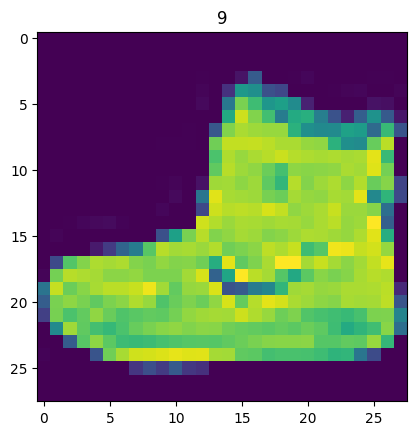

In [42]:
# Visualize image

image, label = train_data[0] # take first image in training data
print(f"Image shape: { image.shape }")

# Render image

# plt.imshow(image)
# uncomment and run this, it will throw an error
# TypeError("Invalid shape {} for image data"
# because imshow() expects width and height but we are giving it color channel, width and height

# lets remove the first dimension. how? remember sequeeze?
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

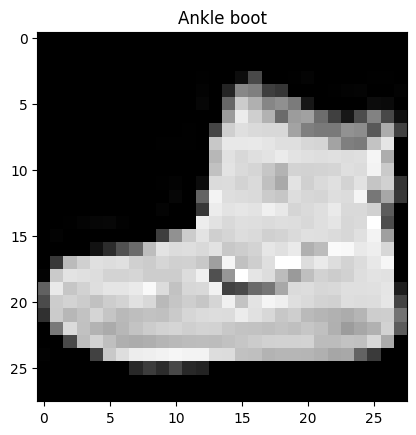

In [51]:
# Lets plot this in gray scale, use cmap

plt.imshow(image.squeeze(), cmap = "gray")
plt.title(train_data.classes[label])

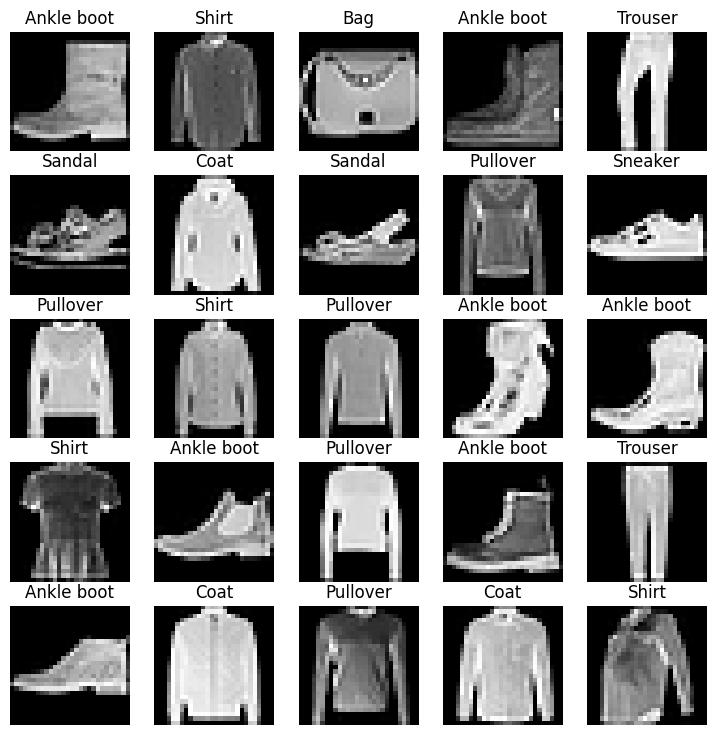

In [81]:
# Plot more random images

torch.manual_seed(42) # comment if you want new random images selected every time
fig = plt.figure(figsize=(9,9))
rows, cols = 5, 5

for i in range(1, rows * cols + 1 ):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  # print(random_idx)
  image, label = train_data[ random_idx ]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")
  plt.title(train_data.classes[label])
  plt.axis(False)

In [79]:
# Observe if some of the image types look the same
# Think about if we get confused recognizing or differentiating them, how will our model differentiate

In [82]:
# THINK: Do you think these items in Fashion MNIST could be modelled with pure linear lines? Or do you think we will need non-linearity?

In [83]:
# Now we will convert our data set into a Data Loader
# Data Loader converts a data into PyTorch iterable

# More specifically, we want to turn our data into batches (mini batches)

In [85]:
# Lets check data again
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [92]:
# Why batches?

# 1. 60,000 is not a lot of data generally in Deep Learning terms
# But we would want to batch this data for training in view of the
# Computer and RAM it would need to train the data at any given point

# 2. Gives our neural network more chances to update its gradient per epoch
# i.e the model gets updated (the internal parameters like weights and biases) every single epoch

# Common batch size is 32 for basic problems like this

# Watch this and other resources you can google to understand mini batch
# https://www.youtube.com/watch?v=yFPLyDwVifc


# Since we have 60,000 images for training, with 32 images per epoch
# 60,000/32 = 1875 epochs needed to train

In [104]:
from torch.utils.data import DataLoader

# Setup batch size hyperparameter
BATCH_SIZE = 32

train_dataloader = DataLoader( dataset = train_data,
                               batch_size = BATCH_SIZE,
                               # if the data is such that it has grouped similar items or same category together, Shuffle makes sure to mix it up for training
                               shuffle = True)

test_dataloader = DataLoader( dataset = test_data,
                               batch_size = BATCH_SIZE,
                               shuffle = False) # For evaluation, the order doesn't really matter even if same type of data comes in sequence

# Read: https://pytorch.org/docs/stable/data.html

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7dc9d179f8e0>,
 <torch.utils.data.dataloader.DataLoader at 0x7dc9d179c910>)

In [106]:
print(f"Train Data Loaders: { train_dataloader } ")
print(f"Train Data Loaders length: { len(train_dataloader) } ")
print(f"Test Data Loaders length: { len(test_dataloader) } ")

# These numbers would change if we change the batch size

Train Data Loaders: <torch.utils.data.dataloader.DataLoader object at 0x7dc9d179f8e0> 
Train Data Loaders length: 1875 
Test Data Loaders length: 313 


In [111]:
# What's inside the training data loader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

# Check output
# 32 batch size
# 1 channel color
# 28x28 size H, W
# output has 32 labels associated with 32 samples

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


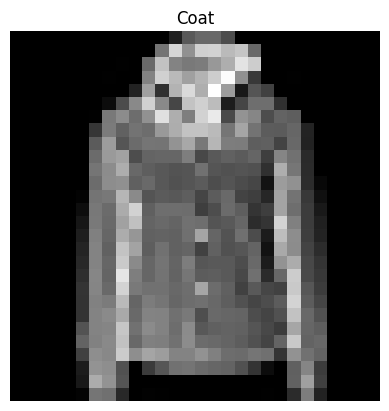

In [120]:
# How do we visualize a single image in a batch i.e visualize one random sample
# Since we have done one iter() over our data, meaning it has the first batch
# and we can visualize any of the 32 images in the batch now

# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[ random_idx ], train_labels_batch[ random_idx ]
plt.imshow(img.squeeze(), cmap="gray")
# plt.title(class_name[label])
plt.title(train_data.classes[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: { label.shape}")